In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime as dt

In [4]:
from pathlib import Path

In [6]:
# Reading whale returns
file_path=Path('whale_returns.csv')

In [16]:
whale_returns=pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [17]:
#count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [18]:
#drop nulls
whale_returns=whale_returns.dropna()

In [20]:
# Reading algorithmic returns
algo_returns_csv=Path('algo_returns.csv')
algo_returns=pd.read_csv(algo_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [21]:
 # Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [22]:
#drop nulls
algo_returns=algo_returns.dropna()

In [23]:
# Reading S&P 500 Closing Prices
sp500_history=Path('sp500_history.csv')
sp500=pd.read_csv(sp500_history,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [24]:
#check data type
sp500.dtypes

Close    object
dtype: object

In [27]:
#Fix Data Types
sp500['Close']=sp500['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [29]:
 # Calculate Daily Returns
sp500_daily_returns=sp500.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [30]:
 # Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [31]:
sp500_daily_returns.dropna(inplace=True)

In [32]:
 # Rename `Close` Column to be specific to this portfolio
sp500_daily_returns.columns=['SP 500']
sp500_daily_returns.head()

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [33]:
 # Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joint_returns=pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
joint_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

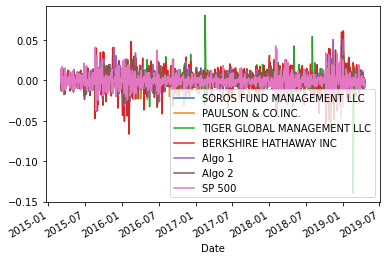

In [34]:
 # Plot daily returns of all portfolios
joint_returns.plot()

<AxesSubplot:xlabel='Date'>

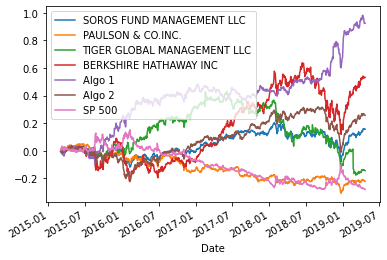

In [35]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cumulative_returns = (1+joint_returns).cumprod() -1
cumulative_returns.plot()

<AxesSubplot:>

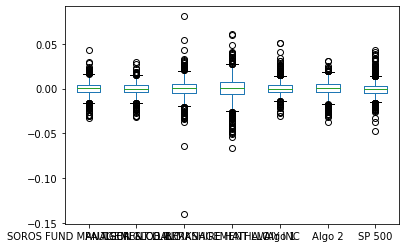

In [36]:
 # Box plot to visually show risk
joint_returns.plot.box()

<AxesSubplot:>

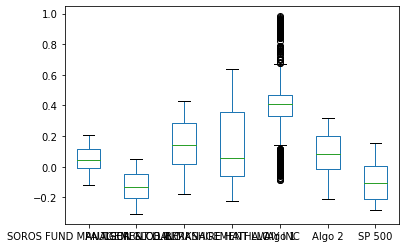

In [37]:
cumulative_returns.plot.box()

In [44]:
# Calculate the daily standard deviations of all portfolios
daily_std=joint_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP 500                         0.008587
dtype: float64


In [43]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_daily_returns.std()
print(sp500_std)

SP 500    0.008135
dtype: float64


In [45]:
# Determine which portfolios are riskier than the S&P 500
daily_std[(daily_std['SP 500'] < daily_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP 500                         0.136313
dtype: float64

<AxesSubplot:xlabel='Date'>

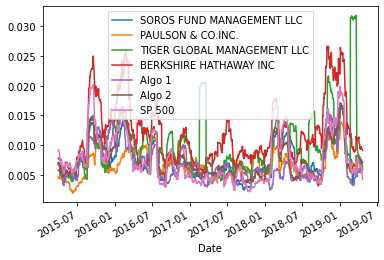

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
joint_returns.rolling(window=21).std().plot()

In [56]:
# Calculate the correlation
# Display de correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


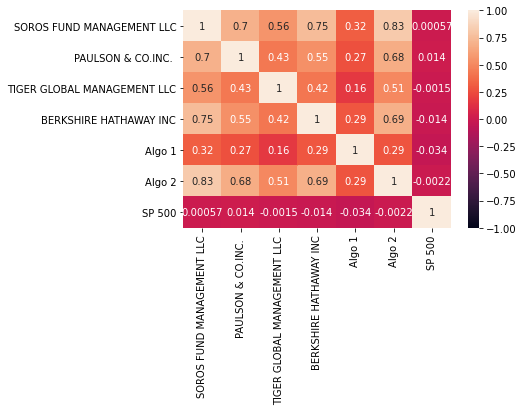

In [58]:
correlation=joint_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

In [79]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend
covariance = joint_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joint_returns['SP 500'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000009
2019-04-16    0.000006
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000007
Length: 1042, dtype: float64

In [80]:
variance=joint_returns['SP 500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: SP 500, Length: 1042, dtype: float64

In [81]:
beta=covariance/variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.213991
2019-04-16    0.150997
2019-04-17    0.144171
2019-04-18    0.144017
2019-04-22    0.185516
Length: 1042, dtype: float64

<AxesSubplot:xlabel='Date'>

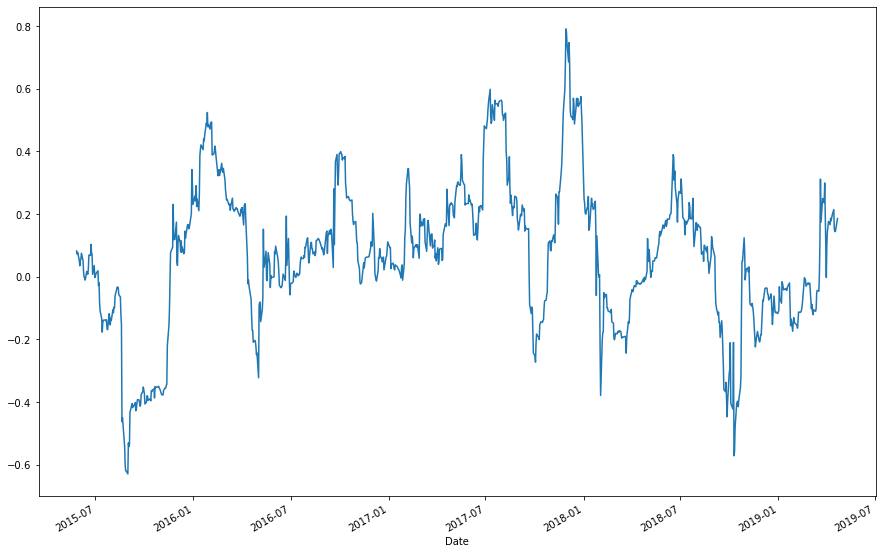

In [84]:
beta.plot(figsize=(15,10))

In [86]:
# Use `ewm` to calculate the rolling window
joint_returns.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


In [93]:
 # Annualized Sharpe Ratios
sharpe_ratios = (joint_returns.mean() * 252) / (joint_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP 500                        -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

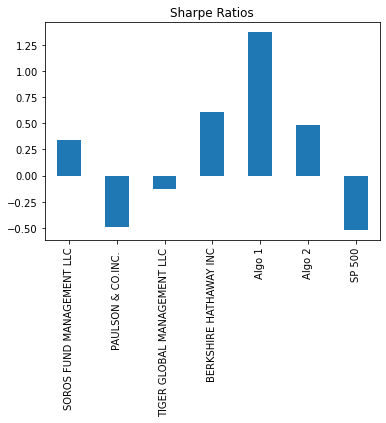

In [94]:
 # Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [101]:
# Reading data from 1st stock
aapl_historical_csv=Path('aapl_historical.csv')
aapl=pd.read_csv(aapl_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True )
aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [108]:
# Read the second stock
cost_historical_csv=Path('cost_historical.csv')
cost=pd.read_csv(cost_historical_csv,index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [109]:
# Read the third stock
goog_historical=Path('goog_historical.csv')
goog=pd.read_csv(goog_historical, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [139]:
 # Combine all stocks in a single DataFrame
all_stocks=pd.concat([aapl, cost, goog], axis='columns', join='inner' )
all_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [140]:
all_stocks=all_stocks.drop(columns=['Symbol'])
all_stocks.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [143]:
all_stocks.columns = ['APPL', 'COST', 'GOOG']
all_stocks.head()

,APPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [144]:
# Calculate daily returns
all_returns=all_stocks.sort_index().pct_change()
all_returns.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [149]:
# Drop NAs
all_returns.dropna(inplace=True)
all_returns.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [152]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
# Display sample data
aapl_weight=0.33
cost_weight=0.33
goog_weight=0.33
portfolio_returns=all_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [153]:
# Join your returns DataFrame to the original returns DataFrame
join_return=pd.concat([joint_returns, all_returns, portfolio_returns], axis='columns', join='inner')
join_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,APPL,COST,GOOG,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.003637,-0.003206,-0.011339,-0.006061


In [154]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_return.dropna(inplace=True)
join_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,APPL,COST,GOOG,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.003637,-0.003206,-0.011339,-0.006061


In [159]:
# Calculate the annualized `std`
join_std=join_return.std()*np.sqrt(252)
join_std.head()

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
dtype: float64

<AxesSubplot:>

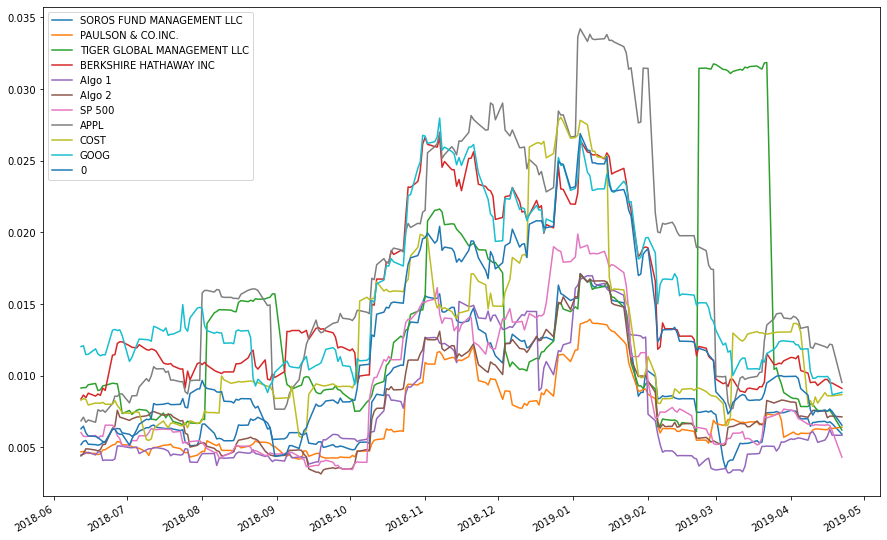

In [161]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
join_return.rolling(window=21).std().plot(figsize=(15,10))

<AxesSubplot:>

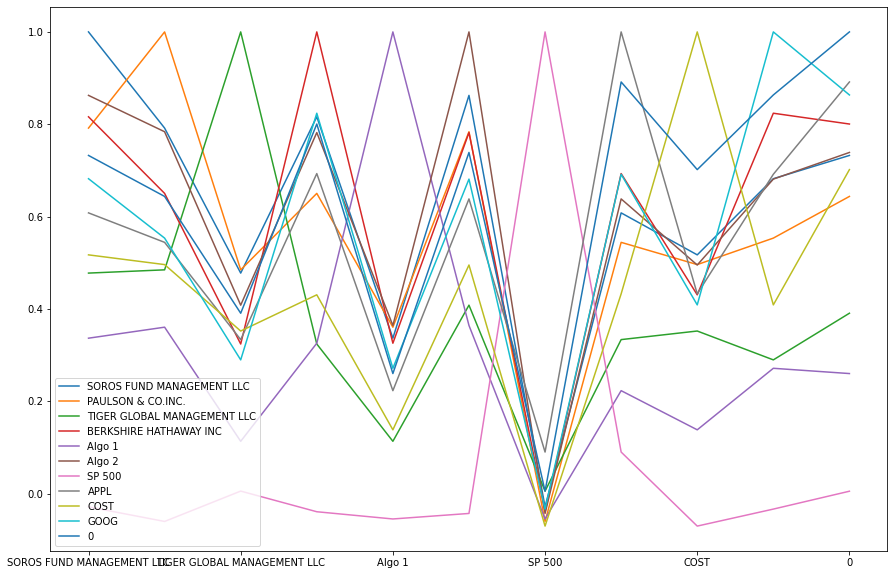

In [164]:
# Calculate and plot the correlation
join_return.corr().plot(figsize=(15,10))

In [166]:
# Calculate and plot Beta
cov=join_return.cov()
cov.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,APPL,COST,GOOG,0
SOROS FUND MANAGEMENT LLC,0.000086,0.000054,0.000065,0.000118,0.000026,0.000070,-2.509830e-06,0.000105,0.000064,0.000102,0.000090
PAULSON & CO.INC.,0.000054,0.000054,0.000052,0.000075,0.000022,0.000051,-4.234986e-06,0.000075,0.000049,0.000066,0.000063
TIGER GLOBAL MANAGEMENT LLC,0.000065,0.000052,0.000215,0.000074,0.000014,0.000053,8.286348e-07,0.000092,0.000069,0.000069,0.000076
BERKSHIRE HATHAWAY INC,0.000118,0.000075,0.000074,0.000243,0.000043,0.000107,-5.810344e-06,0.000202,0.000090,0.000207,0.000166
Algo 1,0.000026,0.000022,0.000014,0.000043,0.000071,0.000027,-4.414382e-06,0.000035,0.000016,0.000037,0.000029


In [167]:
var=join_return.var()
var.head()

SOROS FUND MANAGEMENT LLC      0.000086
PAULSON & CO.INC.              0.000054
TIGER GLOBAL MANAGEMENT LLC    0.000215
BERKSHIRE HATHAWAY INC         0.000243
Algo 1                         0.000071
dtype: float64

<AxesSubplot:>

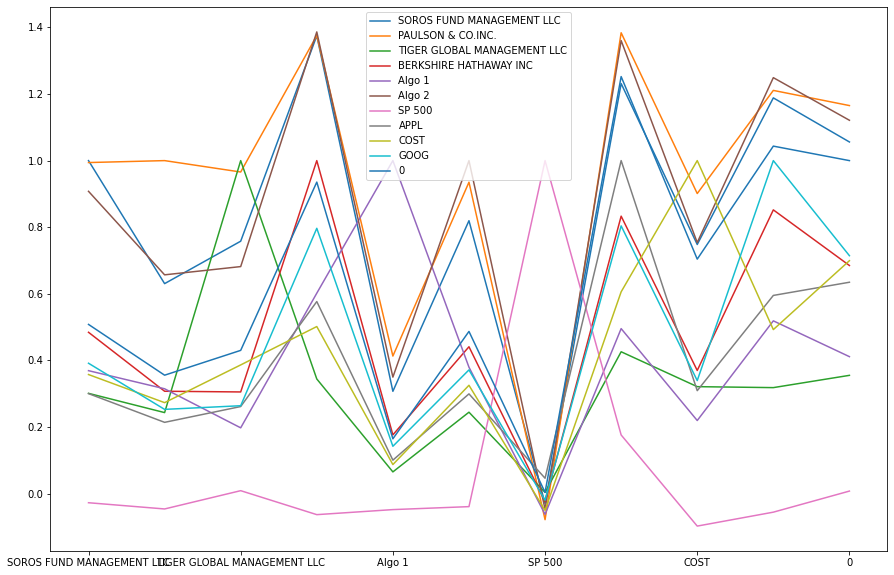

In [169]:
join_beta=cov/var
join_beta.plot(figsize=(15,10))

In [171]:
# Calculate Annualzied Sharpe Ratios
annual_portfolio_sharpe_ratio = (join_return.mean() * 252)/(join_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP 500                        -0.427676
APPL                           0.440644
COST                           1.203329
GOOG                           0.663844
0                              0.876152
dtype: float64

<AxesSubplot:>

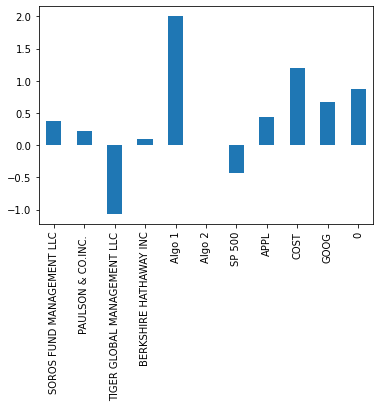

In [172]:
# Visualize the sharpe ratios as a bar plot
annual_portfolio_sharpe_ratio.plot.bar()